In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime


df = pd.read_csv("KC_house_data.csv")

#grade`: Overall score for the quality of the renovations and building materials (score from 1 to 13 - a higher score indicates better quality materials used). This score is calculated according to the King's count scoring system.
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'yr_built', 'lat', 'long']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21613 non-null  float64
 1   bedrooms   21613 non-null  int64  
 2   bathrooms  21613 non-null  float64
 3   sqft_lot   21613 non-null  int64  
 4   yr_built   21613 non-null  int64  
 5   lat        21613 non-null  float64
 6   long       21613 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [82]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Visualisation

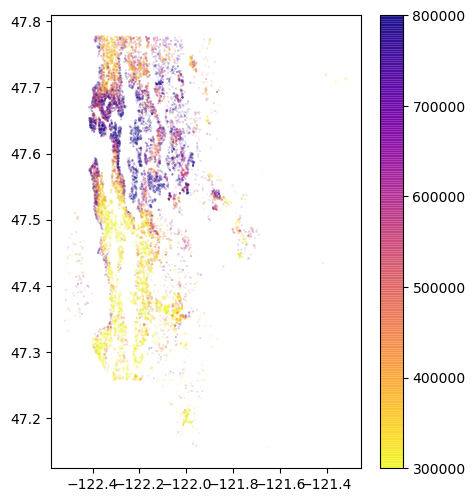

In [106]:
# Visualisation regarding long and lat

import matplotlib.pyplot as plt
import matplotlib.colors as colors



def visualise(df, vmin, vmax):
    
    df_sorted = df.sort_values(by='price')
    x = df_sorted['long']
    y = df_sorted['lat']
    c = df_sorted['price'] 

    plt.rcParams['figure.figsize'] = [5, 6]
    plt.rcParams['figure.dpi'] = 100 

    plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', 
                norm=colors.Normalize(vmin=vmin,vmax=vmax), alpha=0.8)
    plt.colorbar()
    plt.show()
    
visualise(df, 300000, 800000)

## Cross-Validation


In [53]:
# Divide dataset into training set(80%), test set(20%)
labels = df['price']
features = df.drop(['price'],axis=1)

x_train , x_test , y_train , y_test = train_test_split(features , labels , test_size = 0.2,random_state =1234)


## LinearRegression 


In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [62]:
reg.fit(x_train,y_train)
y_preds = reg.predict(x_test)

### Performance 


In [60]:
reg.score(x_test,y_test)

0.39686265680899424

In [99]:
r2 = reg.score(x_test,y_test)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_preds)** (1/2)
print("r2_score: {0}".format(r2))
print("rmse: {0}".format(rmse))


r2_score: 0.39686265680899424
rmse: 347852.6593933223


## KNN

### Prediction by location (latitude and longitude)

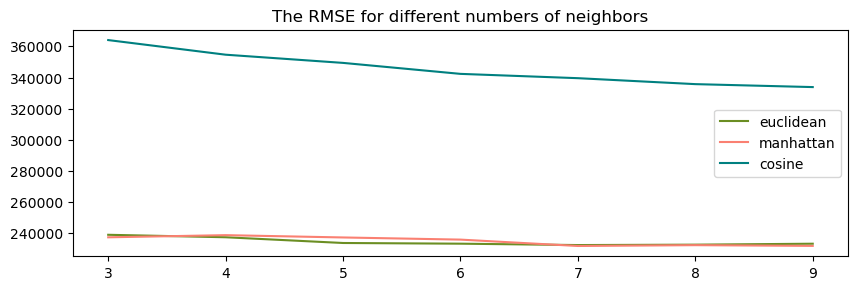

In [105]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

#compute the reasonable K
euclidean = []
manhattan = []
cosine = []

r = range(3,10)
for i in r:
    
    knn = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    knn.fit(x_train[['lat', 'long']],y_train)
    y_preds = knn.predict(x_test[['lat', 'long']])
    euclidean.append(mean_squared_error(y_test, y_preds)** (1/2))
    
    
    knn = KNeighborsRegressor(n_neighbors=i, metric='manhattan')
    knn.fit(x_train[['lat', 'long']],y_train)
    y_preds = knn.predict(x_test[['lat', 'long']])
    manhattan.append(mean_squared_error(y_test, y_preds)** (1/2))
    
    
    knn = KNeighborsRegressor(n_neighbors=i, metric='cosine')
    knn.fit(x_train[['lat', 'long']],y_train)
    y_preds = knn.predict(x_test[['lat', 'long']])
    cosine.append(mean_squared_error(y_test, y_preds)** (1/2))
    
euclidean = np.array(euclidean) 
manhattan = np.array(manhattan) 
cosine = np.array(cosine) 


plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 
plt.plot(r,euclidean,label='euclidean',color='#6B8E23')
plt.plot(r,manhattan,label='manhattan',color='#FA8072')
plt.plot(r,cosine,label='cosine',color='#008080')
plt.legend()
plt.title('The RMSE for different numbers of neighbors')
plt.gca().set_xticks(r)
plt.show()

### K = 5, euclidean, we get smallest rmse, 

### Prediction by bedrooms, bathrooms, entire lot), year of construction, latitude, longitude


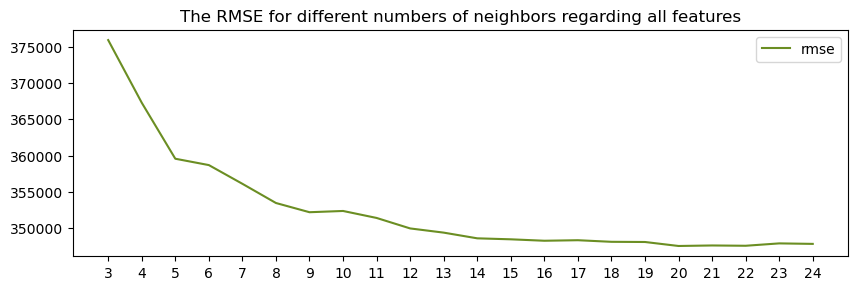

In [108]:
rmse = []

r = range(3,25)
for i in r:
    
    knn = KNeighborsRegressor(n_neighbors=i, metric='euclidean')
    knn.fit(x_train,y_train)
    y_preds = knn.predict(x_test)
    rmse.append(mean_squared_error(y_test, y_preds)** (1/2))
    
rmse = np.array(rmse) 

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 
plt.plot(r,rmse,label='rmse',color='#6B8E23')
plt.legend()
plt.title('The RMSE for different numbers of neighbors regarding all features')
plt.gca().set_xticks(r)
plt.show()

### k=20 